In [1]:
!pip install shap

     |████████████████████████████████| 356 kB 23.6 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491644 sha256=4bd8caf412f874d7a1837f943448520260a39559b28b94aad5db60b72a9ed73e
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [2]:
import shap

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
data=pd.read_csv('/content/drive/MyDrive/dermatology_csv.csv')

In [7]:
data=data.copy()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   erythema                                  366 non-null    int64  
 1   scaling                                   366 non-null    int64  
 2   definite_borders                          366 non-null    int64  
 3   itching                                   366 non-null    int64  
 4   koebner_phenomenon                        366 non-null    int64  
 5   polygonal_papules                         366 non-null    int64  
 6   follicular_papules                        366 non-null    int64  
 7   oral_mucosal_involvement                  366 non-null    int64  
 8   knee_and_elbow_involvement                366 non-null    int64  
 9   scalp_involvement                         366 non-null    int64  
 10  family_history                        

In [9]:
data.shape

(366, 35)

In [10]:
data.size

12810

In [11]:
data.describe()

erythema     scaling  ...         age       class
count  366.000000  366.000000  ...  358.000000  366.000000
mean     2.068306    1.795082  ...   36.296089    2.803279
std      0.664753    0.701527  ...   15.324557    1.597803
min      0.000000    0.000000  ...    0.000000    1.000000
25%      2.000000    1.000000  ...   25.000000    1.000000
50%      2.000000    2.000000  ...   35.000000    3.000000
75%      2.000000    2.000000  ...   49.750000    4.000000
max      3.000000    3.000000  ...   75.000000    6.000000

[8 rows x 35 columns]

In [12]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [13]:
data=data.dropna()

In [14]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
pnl_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [15]:
data.head(5)

erythema  scaling  definite_borders  ...  band-like_infiltrate   age  class
0         2        2                 0  ...                     0  55.0      2
1         3        3                 3  ...                     0   8.0      1
2         2        1                 2  ...                     3  26.0      3
3         2        2                 2  ...                     0  40.0      1
4         2        3                 2  ...                     3  45.0      3

[5 rows x 35 columns]

In [16]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'pnl_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'age', 'class'],
      dtype='object')

In [17]:
data.drop_duplicates(keep='first',inplace=True)

In [18]:
data.shape

(358, 35)

In [19]:
import seaborn as sns

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


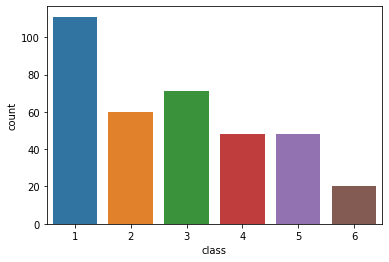

In [20]:
sns.countplot(data['class'])

In [21]:
data.corr()

erythema  ...     class
erythema                                  1.000000  ... -0.324846
scaling                                   0.428769  ... -0.458499
definite_borders                          0.248062  ... -0.381456
itching                                  -0.033157  ...  0.039744
koebner_phenomenon                       -0.008496  ... -0.089586
polygonal_papules                         0.028225  ...  0.064451
follicular_papules                       -0.115275  ...  0.488708
oral_mucosal_involvement                 -0.033391  ...  0.062185
knee_and_elbow_involvement                0.138519  ... -0.382276
scalp_involvement                         0.180740  ... -0.534716
family_history                            0.173740  ... -0.135834
melanin_incontinence                      0.036039  ...  0.064172
eosinophils_in_the_infiltrate             0.071033  ... -0.058692
pnl_infiltrate                            0.220784  ... -0.544519
fibrosis_of_the_papillary_dermis         -0.334604  ...  0.514333
exocytosis                                0.025297  ...  0.280962
acanthosis                                0.085688  ... -0.106554
hyperkeratosis                           -0.040812  ... -0.074791
parakeratosis                             0.214551  ... -0.431909
clubbing_of_the_rete_ridges               0.164601  ... -0.682820
elongation_of_the_rete_ridges             0.023508  ... -0.386975
thinning_of_the_suprapapillary_epidermis  0.162065  ... -0.684076
spongiform_pustule                        0.172272  ... -0.456894
munro_microabcess                         0.108256  ... -0.519218
focal_hypergranulosis                    -0.020583  ...  0.070084
disappearance_of_the_granular_layer       0.153229  ... -0.427314
vacuolisation_and_damage_of_basal_layer  -0.003972  ...  0.062153
spongiosis                                0.038837  ...  0.199351
saw-tooth_appearance_of_retes            -0.012408  ...  0.067255
follicular_horn_plug                     -0.008997  ...  0.441210
perifollicular_parakeratosis              0.006100  ...  0.466687
inflammatory_monoluclear_inflitrate       0.093026  ... -0.046707
band-like_infiltrate                     -0.013850  ...  0.064356
age                                      -0.005028  ... -0.253538
class                                    -0.324846  ...  1.000000

[35 rows x 35 columns]

In [22]:
y=data['class']
x=data.drop(columns='class')

In [23]:
#Balancing the target variable
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state = 0)
x, y = smk.fit_sample(x,y)

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
Function safe_indexing is deprecated; safe_index

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


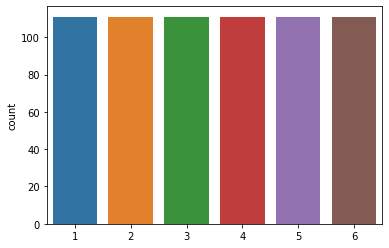

In [24]:
sns.countplot(y)

In [25]:
#Spliting dataset into Train and Test set 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [26]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
#Checking the accuracy of model
from sklearn.metrics import accuracy_score
y_pred=clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(" Testing Accuracy: %.2f%%" % (accuracy * 100.0))
scores = cross_val_score(clf, x_train, y_train, cv=10)
print("Cross Validation Accuracy: %.2f%% " % (scores.mean()*100))

 Testing Accuracy: 99.50%
Cross Validation Accuracy: 98.70% 


Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Text(0.5, 1.0, 'RandomForestClassifier')

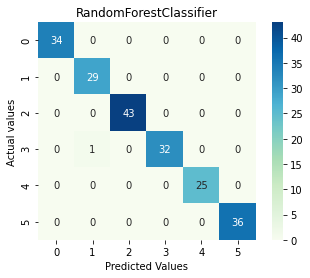

In [29]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con = confusion_matrix(y_test,y_pred)
import seaborn as sns
import matplotlib.pyplot as plt
axes = sns.heatmap(con, square=True,annot=True,fmt='d',cbar = True, cmap = plt.cm.GnBu)
ax = plt.axes()
plt.xlabel('Predicted Values')
plt.ylabel('Actual values')
ax.set_title('RandomForestClassifier')

In [30]:
from sklearn.metrics import classification_report
print('Random Forest Classifier')
print(classification_report(y_test, y_pred))

Random Forest Classifier
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.97      1.00      0.98        29
           3       1.00      1.00      1.00        43
           4       1.00      0.97      0.98        33
           5       1.00      1.00      1.00        25
           6       1.00      1.00      1.00        36

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       1.00      0.99      1.00       200



In [31]:
explainer=shap.TreeExplainer(clf)
shap_values = explainer.shap_values(x)
expected_value = explainer.expected_value

In [32]:
features=['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'pnl_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'age']

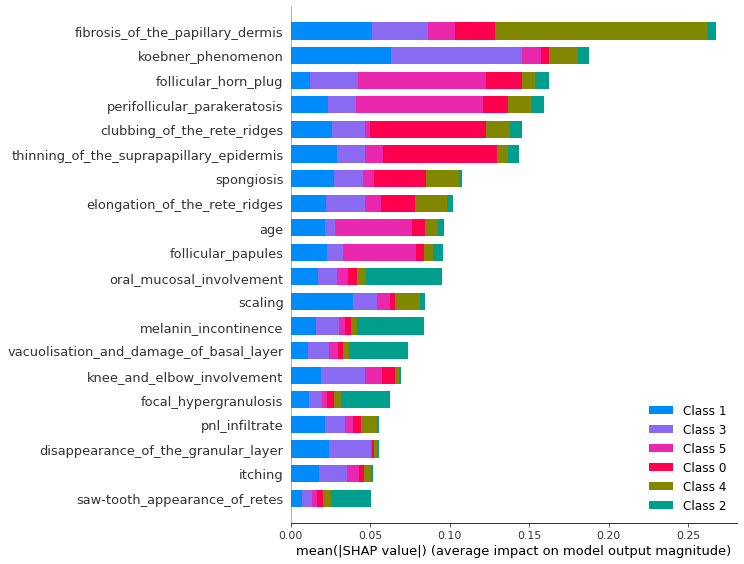

In [33]:
shap.summary_plot(shap_values, x,feature_names=features)

The class of shape values is 1


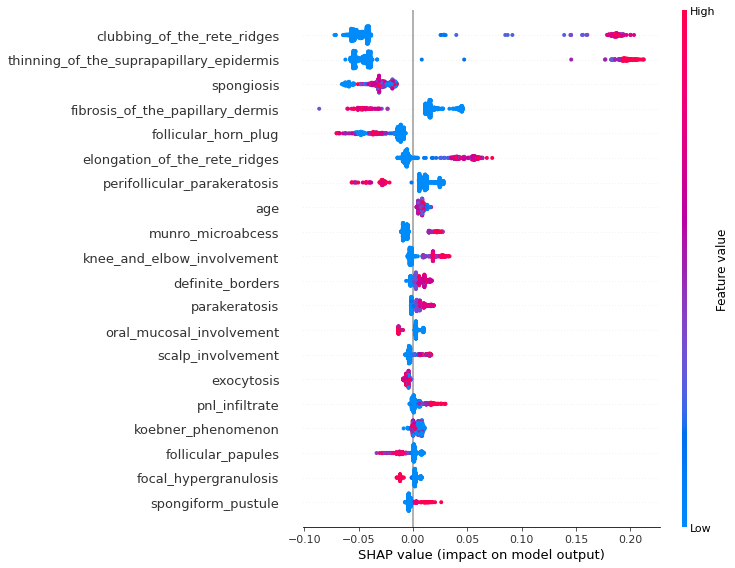

The class of shape values is 2


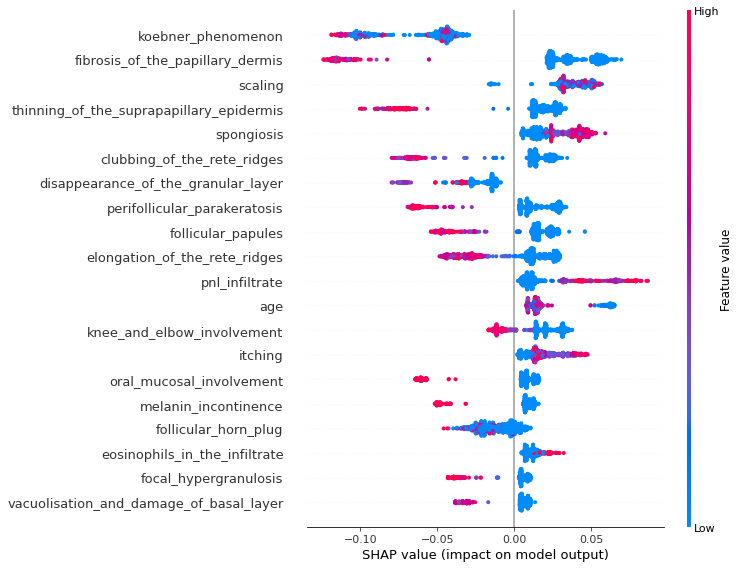

The class of shape values is 3


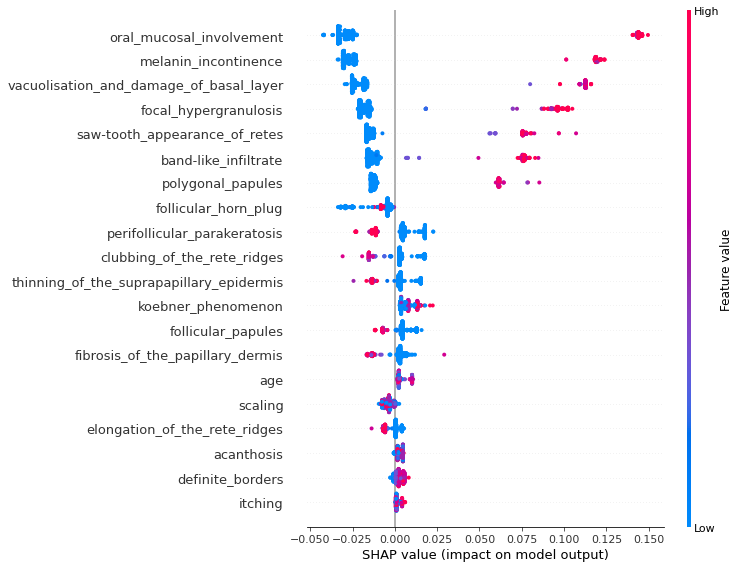

The class of shape values is 4


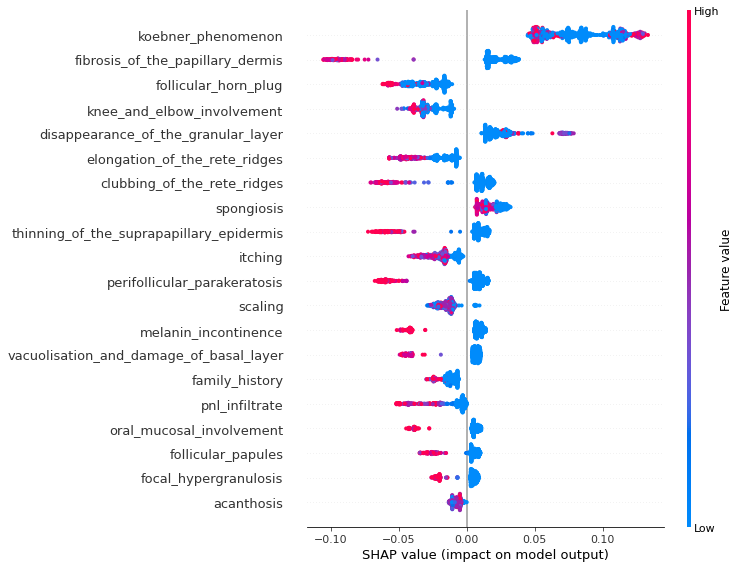

The class of shape values is 5


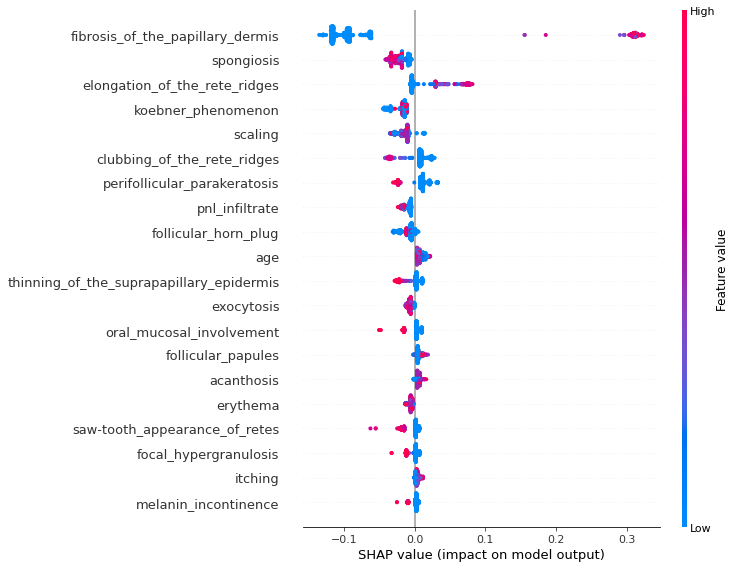

The class of shape values is 6


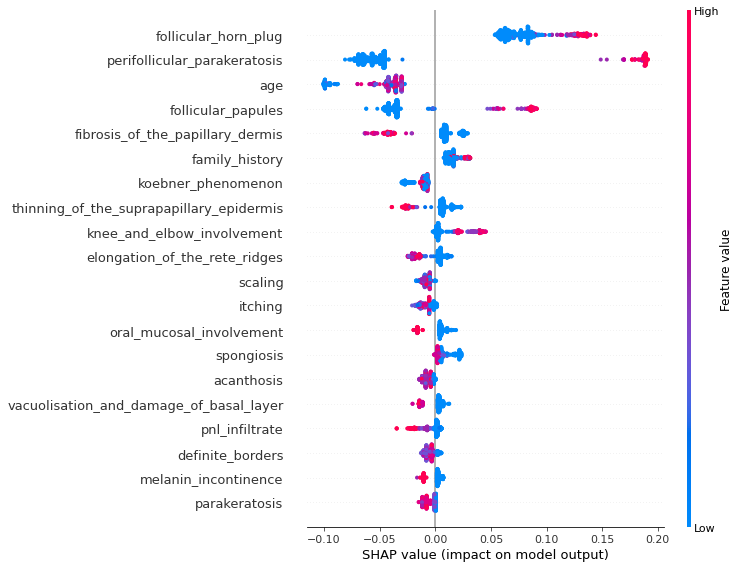

In [36]:
for i in range(6):
  print("The class of shape values is %d"%(i+1))
  shap.summary_plot(shap_values[i], x,feature_names=features)

The actual value of 1


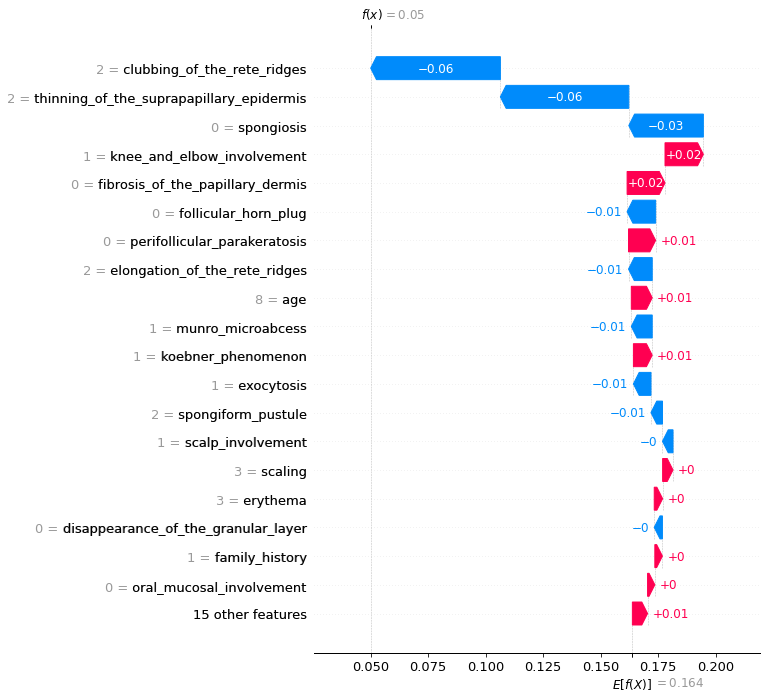

In [41]:
# Generate waterfall plot 
print("The actual value of %d" %y[1])
shap.plots._waterfall.waterfall_legacy(expected_value[0],shap_values[0][0],x[1], max_display=20, show=True,feature_names=features)

The actual value of 2


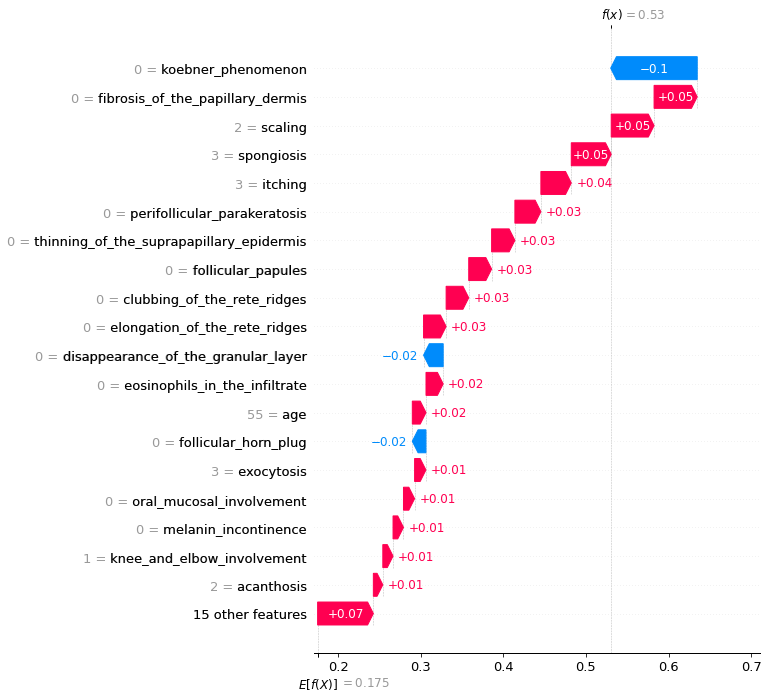

In [42]:
# Generate waterfall plot 
print("The actual value of %d" %y[0])
shap.plots._waterfall.waterfall_legacy(expected_value[1],shap_values[1][0],x[0], max_display=20, show=True,feature_names=features)

The actual value of 3


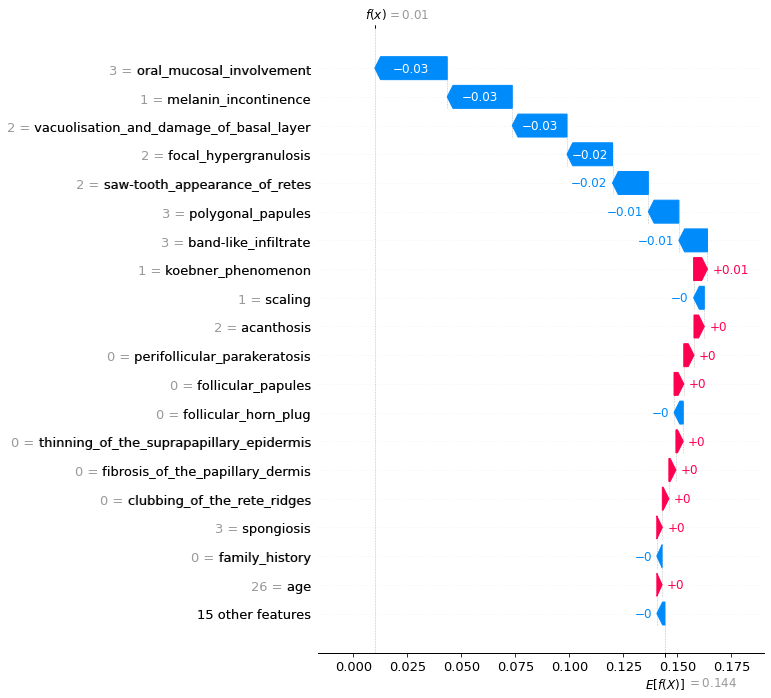

In [43]:
# Generate waterfall plot 
print("The actual value of %d" %y[2])
shap.plots._waterfall.waterfall_legacy(expected_value[2],shap_values[2][0],x[2], max_display=20, show=True,feature_names=features)

The actual value of 4


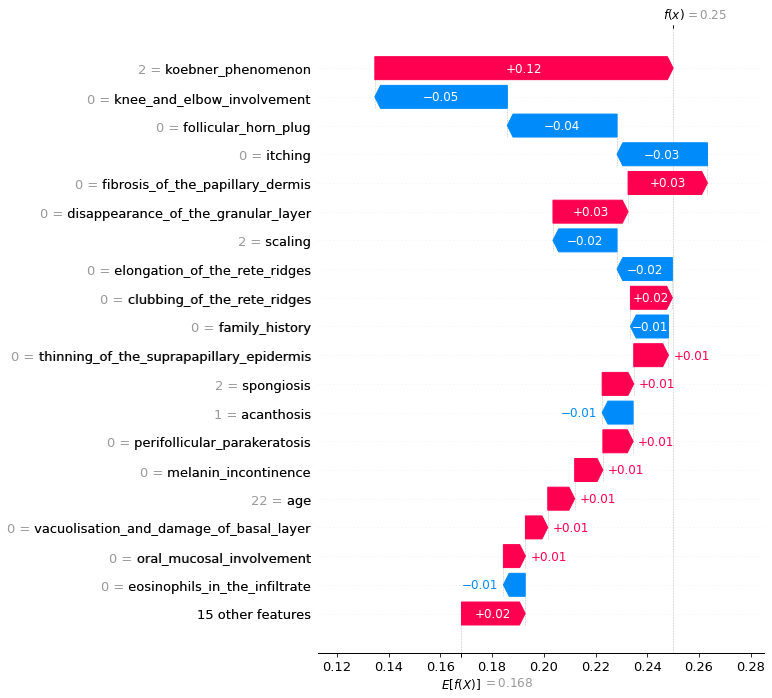

In [44]:
# Generate waterfall plot 
print("The actual value of %d" %y[8])
shap.plots._waterfall.waterfall_legacy(expected_value[3],shap_values[3][0],x[8], max_display=20, show=True,feature_names=features)

The actual value of 5


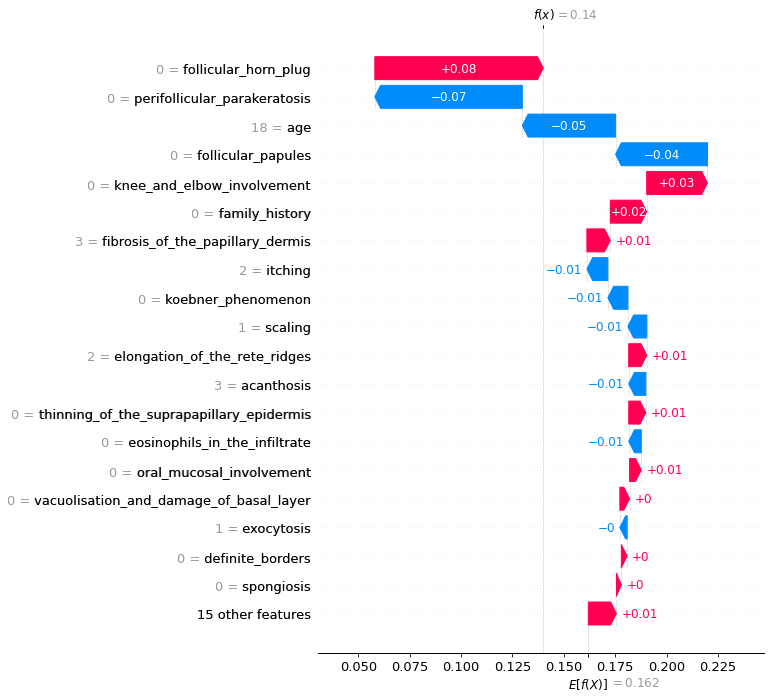

In [45]:
# Generate waterfall plot 
print("The actual value of %d" %y[6])
shap.plots._waterfall.waterfall_legacy(expected_value[5],shap_values[5][0],x[6], max_display=20, show=True,feature_names=features)

The actual value of 6


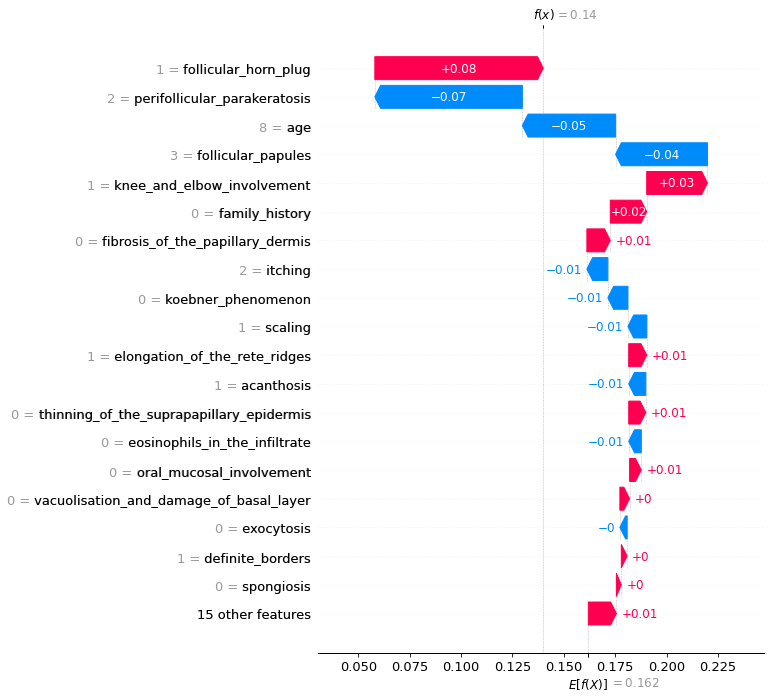

In [46]:
# Generate waterfall plot 
print("The actual value of %d" %y[20])
shap.plots._waterfall.waterfall_legacy(expected_value[5],shap_values[5][0],x[20], max_display=20, show=True,feature_names=features)

The actual value of 1


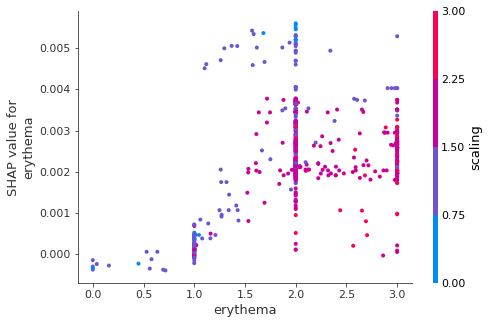

In [47]:
print("The actual value of %d" %y[1])
shap.dependence_plot(0, shap_values[0], x,feature_names=features)

The actual value of 2


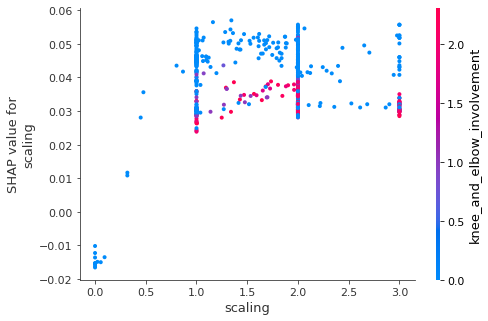

In [53]:
print("The actual value of %d" %y[0])
shap.dependence_plot(1, shap_values[1], x,feature_names=features)

The actual value of 3


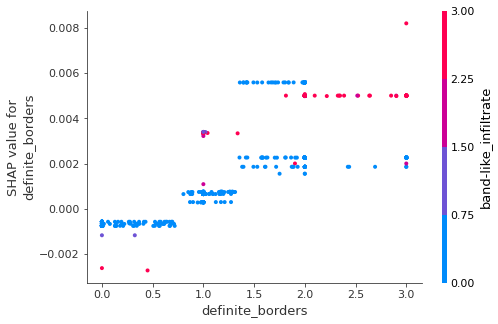

In [54]:
print("The actual value of %d" %y[2])
shap.dependence_plot(2, shap_values[2], x,feature_names=features)

The actual value of 4


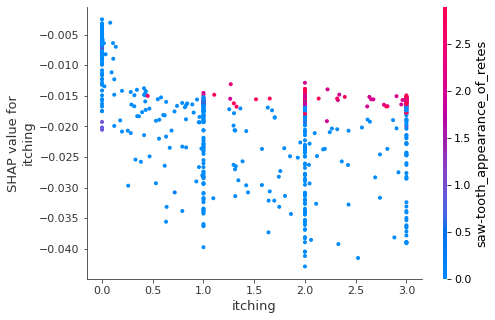

In [55]:
print("The actual value of %d" %y[8])
shap.dependence_plot(3, shap_values[3], x,feature_names=features)

The actual value of 5


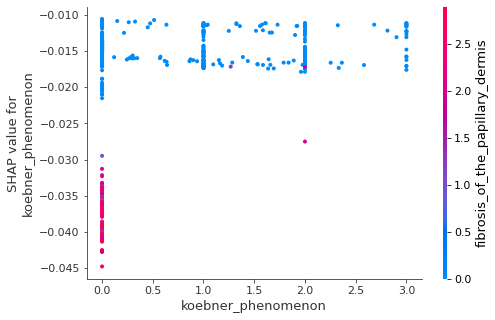

In [59]:
print("The actual value of %d" %y[6])
shap.dependence_plot(4, shap_values[4], x,feature_names=features)

The actual value of 6


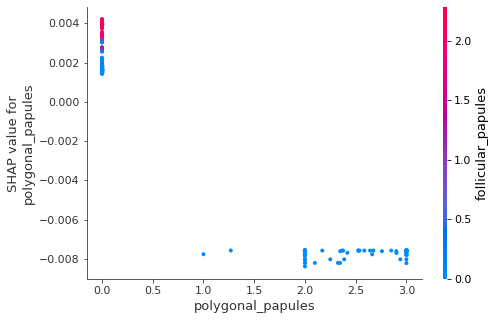

In [60]:
print("The actual value of %d" %y[20])
shap.dependence_plot(5, shap_values[5], x,feature_names=features)

In [64]:
# Generate force plot - Single
shap.initjs()
print("The actual value of y: %d" %y[1])
shap.force_plot(explainer.expected_value[0], shap_values[0][0], x[1],feature_names=features)

The actual value of y: 1


In [65]:
shap.initjs()
print("The actual value of y: %d" %y[0])
shap.force_plot(expected_value[1], shap_values[1][0], x[0],feature_names=features)

The actual value of y: 2


In [66]:
shap.initjs()
print("The actual value of y: %d" %y[2])
shap.force_plot(expected_value[2], shap_values[2][0], x[2],feature_names=features)


The actual value of y: 3


In [67]:
shap.initjs()
print("The actual value of y: %d" %y[8])
shap.force_plot(expected_value[3], shap_values[3][0], x[8],feature_names=features)


The actual value of y: 4


In [69]:
shap.initjs()
print("The actual value of y: %d" %y[6])
shap.force_plot(expected_value[4], shap_values[4][0], x[6],feature_names=features)


The actual value of y: 5


In [70]:
shap.initjs()
print("The actual value of y: %d" %y[20])
shap.force_plot(expected_value[5], shap_values[5][0], x[20],feature_names=features)

The actual value of y: 6


The actual value of y: 1


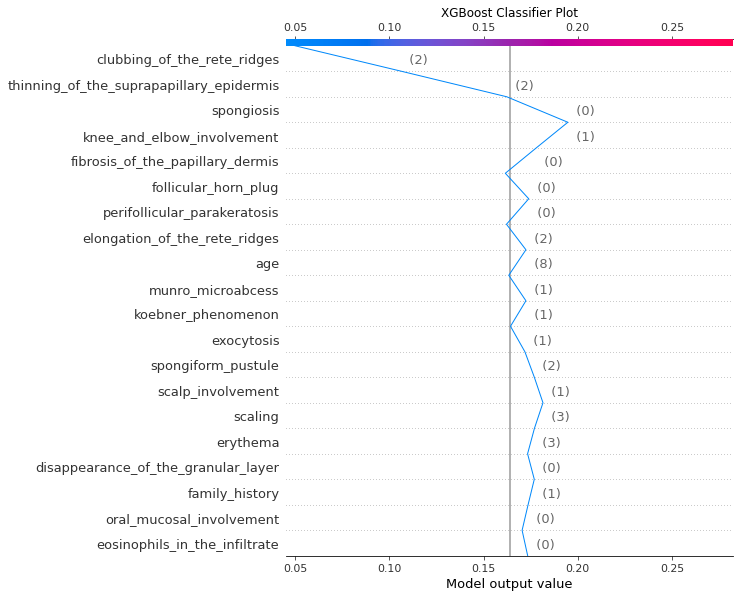

In [71]:
# Generate Decision plot 
print("The actual value of y: %d" %y[1])
shap.decision_plot(expected_value[0], shap_values[0][0],features=x[1], show=True,title="XGBoost Classifier Plot",feature_names=features)

The actual value of y: 2


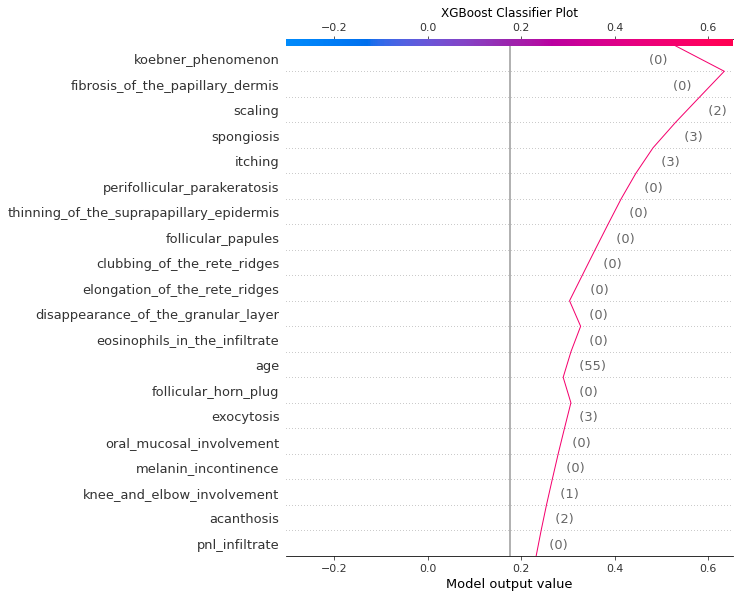

In [72]:
# Generate Decision plot 
print("The actual value of y: %d" %y[0])
shap.decision_plot(expected_value[1], shap_values[1][0],features=x[0], show=True,title="XGBoost Classifier Plot",feature_names=features)

The actual value of y: 3


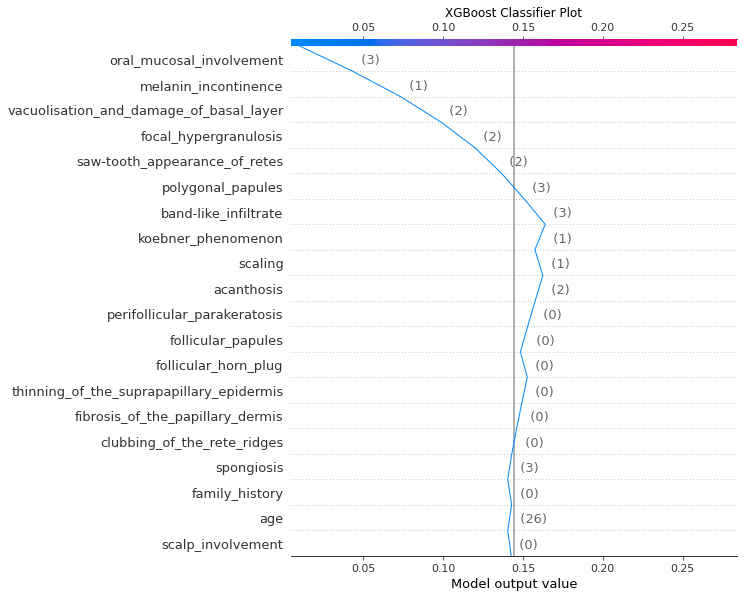

In [73]:
# Generate Decision plot
print("The actual value of y: %d" %y[2])
shap.decision_plot(expected_value[2], shap_values[2][0],features=x[2], show=True,title="XGBoost Classifier Plot",feature_names=features)

The actual value of y: 4


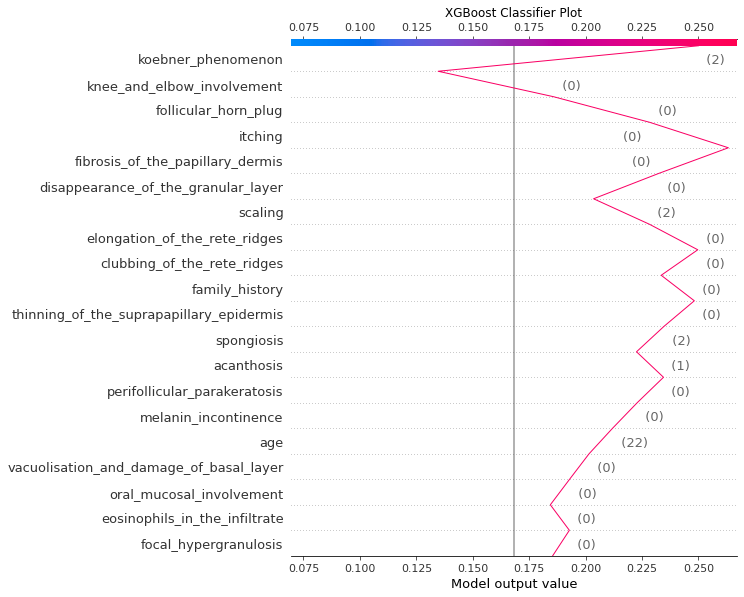

In [74]:
# Generate Decision plot 
print("The actual value of y: %d" %y[8])
shap.decision_plot(expected_value[3], shap_values[3][0],features=x[8], show=True,title="XGBoost Classifier Plot",feature_names=features)

The actual value of y: 5


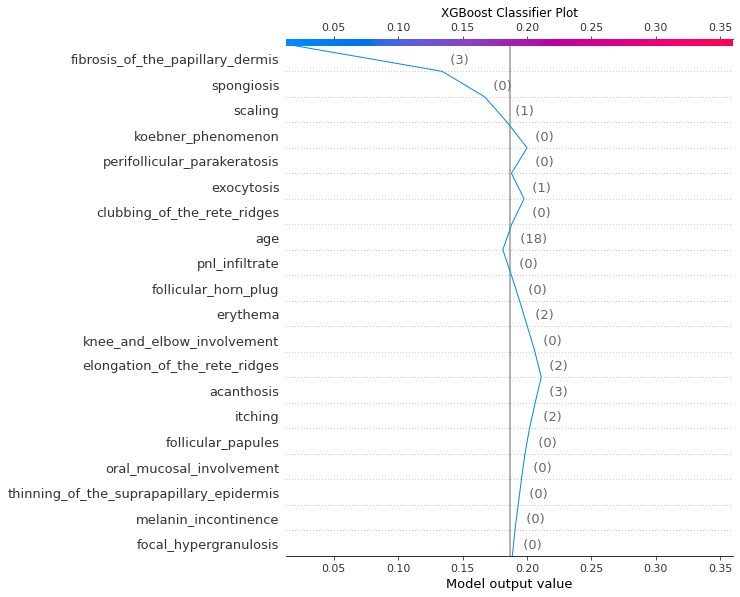

In [75]:
# Generate Decision plot 
print("The actual value of y: %d" %y[6])
shap.decision_plot(expected_value[4], shap_values[4][0],features=x[6], show=True,title="XGBoost Classifier Plot",feature_names=features)

The actual value of y: 6


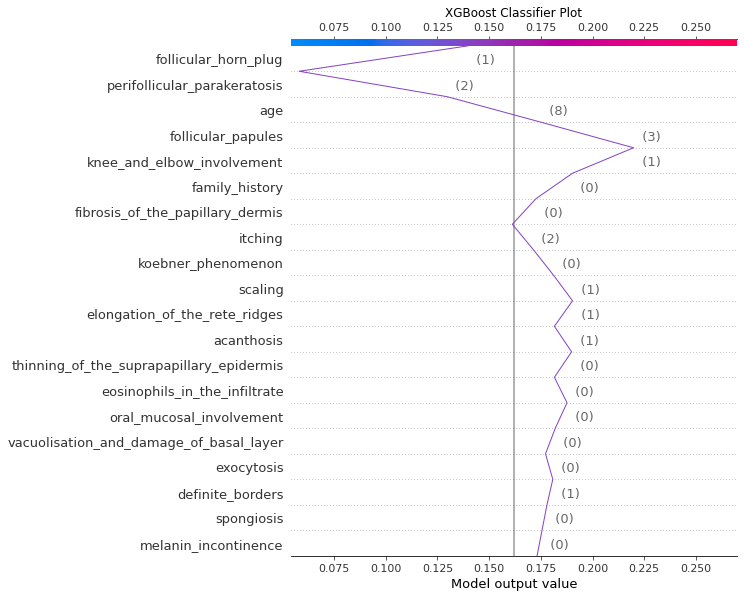

In [76]:
# Generate Decision plot 
print("The actual value of y: %d" %y[20])
shap.decision_plot(expected_value[5], shap_values[5][0],features=x[20], show=True,title="XGBoost Classifier Plot",feature_names=features)

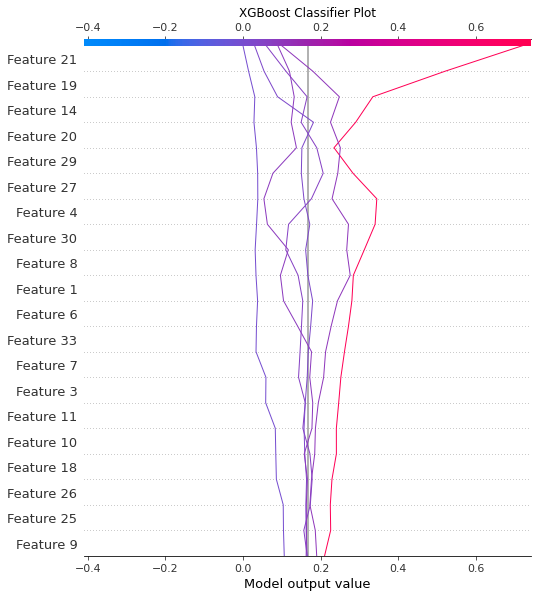

In [77]:
shap.multioutput_decision_plot(list(expected_value), list(shap_values),features=x, show=True,title="XGBoost Classifier Plot",row_index=10)